In [35]:
sample_size_gtex_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/gtex_v7_sample_n.txt"

In [36]:
sample_size_gtex = read.csv(sample_size_gtex_filename, header = T)
head(sample_size_gtex)

tissue,n
Adipose - Subcutaneous,442
Adipose - Visceral (Omentum),355
Adrenal Gland,190
Artery - Aorta,299
Artery - Coronary,173
Artery - Tibial,441


In [37]:
dir = "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/"

In [38]:
egene_files = list.files(dir,"*.egenes.txt")

In [39]:
df = sample_size_gtex
df$tissue = gsub(" ","_",gsub("-","_",df$tissue))
df$tissue = gsub("\\)","",gsub("\\(","",df$tissue))
df$tissue = gsub("___","_",df$tissue)
df$tissue = gsub("__","_",df$tissue)
head(df)

tissue,n
Adipose_Subcutaneous,442
Adipose_Visceral_Omentum,355
Adrenal_Gland,190
Artery_Aorta,299
Artery_Coronary,173
Artery_Tibial,441


In [40]:
for (i in 1:length(egene_files)){
    file_name = egene_files[i]
    tissue = gsub(".v7.egenes.txt","",file_name)
    tissue = gsub("-","_",tissue)
    file = read.csv(paste0(dir,file_name), sep = "\t")
#     print(head(file))
#     print(nrow(file[file$qval < 0.01,]))
#     df[df$tissue == tissue,"fdr0.01"] = nrow(file[file$qval < 0.01,])
    df[df$tissue == tissue,"fdr0.05"] = nrow(file[file$qval < 0.05,])
#     df[df$tissue == tissue,"fdr0.1"] = nrow(file[file$qval < 0.1,])
}
df

tissue,n,fdr0.05
Adipose_Subcutaneous,442,11866
Adipose_Visceral_Omentum,355,8991
Adrenal_Gland,190,6421
Artery_Aorta,299,9205
Artery_Coronary,173,4383
Artery_Tibial,441,11947
Bladder,11,NA
Brain_Amygdala,100,2229
Brain_Anterior_cingulate_cortex_BA24,121,4103
Brain_Caudate_basal_ganglia,160,5700


In [41]:
df$fdr0.01 <- c()
df$fdr0.1 <- c()
head(df)

tissue,n,fdr0.05
Adipose_Subcutaneous,442,11866
Adipose_Visceral_Omentum,355,8991
Adrenal_Gland,190,6421
Artery_Aorta,299,9205
Artery_Coronary,173,4383
Artery_Tibial,441,11947


In [42]:
length(df$tissue[grep("Brain",df$tissue)])
length(df$tissue)
df

[1] 13

[1] 53

tissue,n,fdr0.05
Adipose_Subcutaneous,442,11866
Adipose_Visceral_Omentum,355,8991
Adrenal_Gland,190,6421
Artery_Aorta,299,9205
Artery_Coronary,173,4383
Artery_Tibial,441,11947
Bladder,11,NA
Brain_Amygdala,100,2229
Brain_Anterior_cingulate_cortex_BA24,121,4103
Brain_Caudate_basal_ganglia,160,5700


In [43]:
# data_folder = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/analysis_results/20200103_data_freeze/"
# leads_filename = paste0(data_folder,"eqtl/pool1_17.eqtl_discovery_all_leads.fdr0.1.tsv")
# leads = read.csv(leads_filename, header = T, sep = "\t")
# head(leads,2)

In [44]:
leads = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR.csv")
head(leads,2)

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,global_corr_p_value,label
21_30373541_T_C,2.920966e-25,-0.8525780,0.08210206,1.632719e-14,21,30376705,30391699,173,173,...,192.39730,21,30373541,C,1,0.2398844,0.09609073,ENSG00000156253,1.400559e-12,FPP_D11
21_30432557_G_A,1.495486e-48,0.5058675,0.03454695,1.169470e-31,21,30428126,30446118,173,173,...,34.96152,21,30432557,A,1,0.1358382,1.00000000,ENSG00000156261,1.059433e-28,FPP_D11


In [45]:
df0 = data.frame()
for (i in 1:length(unique(leads$label))){
    celltype = unique(leads$label)[i]
    l = leads[leads$label == celltype,]
    df_tmp = data.frame(tissue = celltype, n = l$n_samples[1],
#                 fdr0.1 = length(unique(l$feature_id)),
                fdr0.05 = length(unique(l[l$global_corr_p_value < 0.05,]$feature_id)))#,
#                 fdr0.01 = length(unique(l[l$global_corr_p_value < 0.01,]$feature_id)))
    df0 = rbind(df0,df_tmp)
}
df0

tissue,n,fdr0.05
FPP_D11,173,1781
P_FPP_D11,172,1799
DA_D30,165,672
Sert_D30,151,545
Epen1_D30,133,621
FPP_D30,152,617
DA_D52,156,697
Sert_D52,140,777
Epen1_D52,148,744
Astro_D52,104,111


In [46]:
df1 = data.frame(tissue = "neuroseq", n = max(df0$n),
#                 fdr0.1 = length(unique(leads$feature_id)),
                fdr0.05 = length(unique(leads[leads$global_corr_p_value < 0.05,]$feature_id)))#,
#                 fdr0.01 = length(unique(leads[leads$global_corr_p_value < 0.01,]$feature_id)))
head(df1)

tissue,n,fdr0.05
neuroseq,173,3052


In [47]:
library(ggplot2)

In [48]:
df2 = rbind(df,df0,df1)

In [49]:
nrow(df2)

[1] 68

In [50]:
# ggplot(df2, aes(x = n, y = fdr0.1)) + 
#         geom_point() + ylab("# eGenes at FDR 10%") + xlab("# unique samples") +
#         geom_point(data = df2[grep("Brain",df2$tissue),], aes(x = n, y = fdr0.1), col = "cornflowerblue")+
#         geom_point(data = df2[df2$tissue == "neuroseq",], aes(x = n, y = fdr0.1), col = "red", size = 2.5)+
#         geom_point(data = df2[df2$tissue %in% unique(leads$label),], aes(x = n, y = fdr0.1), col = "blue", size = 1.5)

Warning message:
“Ignoring unknown parameters: border”Warning message:
“Removed 5 rows containing missing values (geom_point).”

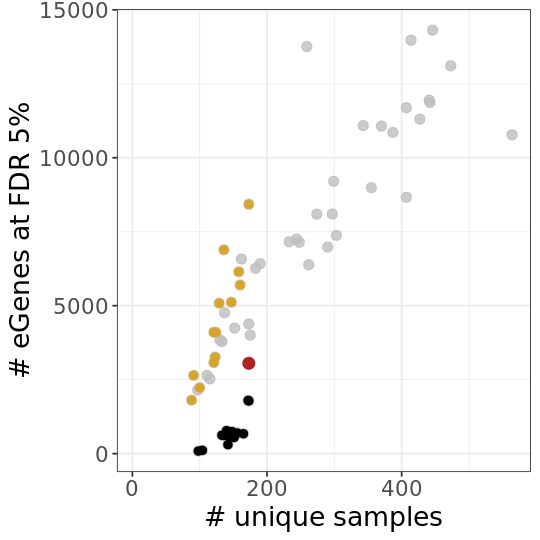

In [51]:
options(repr.plot.width = 4.5, repr.plot.height = 4.5)
ggplot(df2, aes(x = n, y = fdr0.05)) + 
        geom_point(size = 2.5, alpha = 0.8, col = 'gray') + ylab("# eGenes at FDR 5%") + xlab("# unique samples") +
        geom_point(data = df2[grep("Brain",df2$tissue),], aes(x = n, y = fdr0.05), col = "goldenrod", size = 2)+
        geom_point(data = df2[df2$tissue == "neuroseq",], aes(x = n, y = fdr0.05), col = "firebrick", size = 3)+
        geom_point(data = df2[df2$tissue %in% unique(leads$label),], aes(x = n, y = fdr0.05), size = 2, col = "black", border = 'white')+
        theme_bw() + theme(text = element_text(size=16))

Warning message:
“Ignoring unknown parameters: border”Warning message:
“Removed 7 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

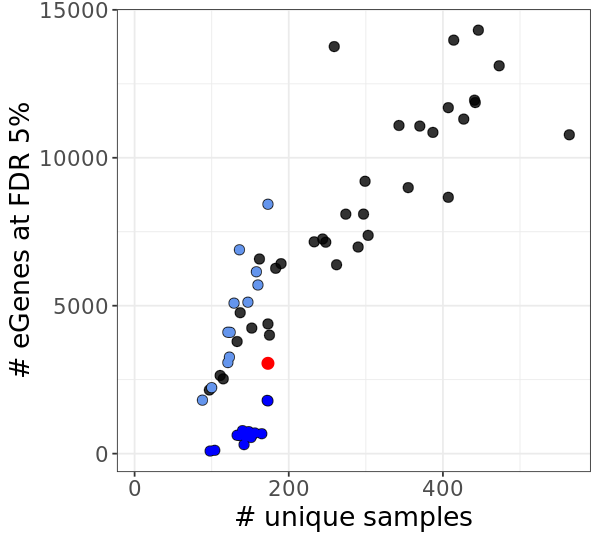

In [45]:
options(repr.plot.width = 5, repr.plot.height = 4.5)
ggplot(df2, aes(x = n, y = fdr0.05)) + 
        geom_point(size = 2.5, alpha = 0.8) + ylab("# eGenes at FDR 5%") + xlab("# unique samples") +
        geom_point(data = df2[grep("Brain",df2$tissue),], aes(x = n, y = fdr0.05), col = "cornflowerblue", size = 2)+
        geom_point(data = df2[df2$tissue == "neuroseq",], aes(x = n, y = fdr0.05), col = "red", size = 3)+
        geom_point(data = df2[df2$tissue %in% unique(leads$label),], aes(x = n, y = fdr0.05), col = "blue", border = 'darkblue',size = 2)+
        theme_bw() + theme(text = element_text(size=16))

In [ ]:
# ggplot(df2, aes(x = n, y = fdr0.01)) + 
#         geom_point() + ylab("# eGenes at FDR 1%") + xlab("# unique samples") +
#         geom_point(data = df2[df2$tissue == "neuroseq",], aes(x = n, y = fdr0.01), col = "red", size = 2.5)+
#         geom_point(data = df2[df2$tissue %in% unique(leads$label),], aes(x = n, y = fdr0.01), col = "blue", size = 1.5)